# Get Dataset

In [1]:
!wget https://s3-ap-southeast-1.amazonaws.com/he-public-data/datasetb2d9982.zip

--2023-04-22 11:56:54--  https://s3-ap-southeast-1.amazonaws.com/he-public-data/datasetb2d9982.zip
Resolving s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)... 52.219.132.250
Connecting to s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)|52.219.132.250|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 895569552 (854M) [binary/octet-stream]
Saving to: ‘datasetb2d9982.zip’

datasetb2d9982.zip  100%[===================>] 854.08M  12.9MB/s    in 70s     

2023-04-22 11:58:05 (12.3 MB/s) - ‘datasetb2d9982.zip’ saved [895569552/895569552]



In [2]:
!unzip datasetb2d9982.zip

Archive:  datasetb2d9982.zip
   creating: dataset/
  inflating: dataset/sample_submission.csv  
  inflating: dataset/train.csv       
  inflating: dataset/test.csv        


# Imports

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Load Dataset

In [4]:
train = pd.read_csv("dataset/train.csv")
test = pd.read_csv("dataset/test.csv")
sample = pd.read_csv("dataset/sample_submission.csv")

# Analysis

## Basic Info

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2249698 entries, 0 to 2249697
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   PRODUCT_ID       int64  
 1   TITLE            object 
 2   BULLET_POINTS    object 
 3   DESCRIPTION      object 
 4   PRODUCT_TYPE_ID  int64  
 5   PRODUCT_LENGTH   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 103.0+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734736 entries, 0 to 734735
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   PRODUCT_ID       734736 non-null  int64 
 1   TITLE            734731 non-null  object
 2   BULLET_POINTS    458814 non-null  object
 3   DESCRIPTION      354735 non-null  object
 4   PRODUCT_TYPE_ID  734736 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 28.0+ MB


In [7]:
train.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,NaN,1650,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",NaN,2755,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,NaN,NaN,6112,598.424000


## NULL Checks

In [8]:
train.isna().sum()

PRODUCT_ID               0
TITLE                   12
BULLET_POINTS       837364
DESCRIPTION        1157381
PRODUCT_TYPE_ID          0
PRODUCT_LENGTH           0
dtype: int64

In [9]:
test.isna().sum()

PRODUCT_ID              0
TITLE                   5
BULLET_POINTS      275922
DESCRIPTION        380001
PRODUCT_TYPE_ID         0
dtype: int64

In [10]:
ltrain = len(train)
train.isna().sum()/ltrain

PRODUCT_ID         0.000000
TITLE              0.000005
BULLET_POINTS      0.372212
DESCRIPTION        0.514461
PRODUCT_TYPE_ID    0.000000
PRODUCT_LENGTH     0.000000
dtype: float64

In [11]:
ltest = len(test)
test.isna().sum()/ltest

PRODUCT_ID         0.000000
TITLE              0.000007
BULLET_POINTS      0.375539
DESCRIPTION        0.517194
PRODUCT_TYPE_ID    0.000000
dtype: float64

In [12]:
rtrain = len(train[train["DESCRIPTION"].isna() & train["BULLET_POINTS"].isna()])
print(rtrain, rtrain/ltrain)

rtest = len(test[test["DESCRIPTION"].isna() & test["BULLET_POINTS"].isna()])
print(rtest, rtest/ltest)

783507 0.3482720791857396
258190 0.3514051305502929


In [13]:
rtrain2 = len(train[train["DESCRIPTION"].isna() & train["BULLET_POINTS"].isna() & train["TITLE"].isna()])
print(rtrain2, rtrain2/ltrain)

rtest2 = len(test[test["DESCRIPTION"].isna() & test["BULLET_POINTS"].isna() & test["TITLE"].isna()])
print(rtest2, rtest2/ltest)

10 4.445041067734425e-06
3 4.083099235643823e-06


## Distribution

In [14]:
train.describe()["PRODUCT_LENGTH"]

count    2.249698e+06
mean     4.071839e+03
std      1.351685e+06
min      1.000000e+00
25%      5.118110e+02
50%      6.630000e+02
75%      1.062992e+03
max      1.885801e+09
Name: PRODUCT_LENGTH, dtype: float64

[Text(0.5, 0, 'log10(PRODUCT_LENGTH)'), Text(0, 0.5, 'count')]

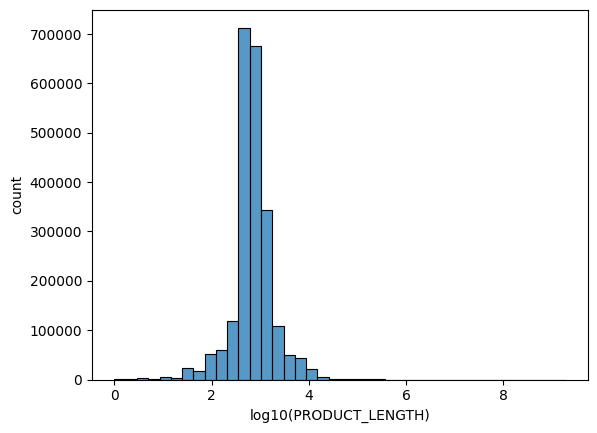

In [15]:
ax = sns.histplot(np.log10(train["PRODUCT_LENGTH"]), bins = 40, stat="count")
ax.set(xlabel = "log10(PRODUCT_LENGTH)", ylabel="count")

## Product Type

In [16]:
trainpid = set(train["PRODUCT_TYPE_ID"])
testpid = set(train["PRODUCT_TYPE_ID"])

print(len(trainpid), len(testpid), len(trainpid.intersection(testpid)))

12907 12907 12907


In [17]:
pid_summary = []
for pid in tqdm(trainpid) : 
  s = train[train["PRODUCT_TYPE_ID"] == pid].describe()["PRODUCT_LENGTH"]
  r = s.to_dict()
  r["PRODUCT_TYPE_ID"] = pid
  pid_summary.append(r)

pid_summary = pd.DataFrame(pid_summary)
pid_summary.info()

100%|██████████| 12907/12907 [02:41<00:00, 80.06it/s]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12907 entries, 0 to 12906
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   count            12907 non-null  float64
 1   mean             12907 non-null  float64
 2   std              11015 non-null  float64
 3   min              12907 non-null  float64
 4   25%              12907 non-null  float64
 5   50%              12907 non-null  float64
 6   75%              12907 non-null  float64
 7   max              12907 non-null  float64
 8   PRODUCT_TYPE_ID  12907 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 907.6 KB


In [18]:
pid_summary[pid_summary["std"].isna()]["count"].unique()

array([1.])

[Text(0.5, 0, 'std'), Text(0, 0.5, 'count')]

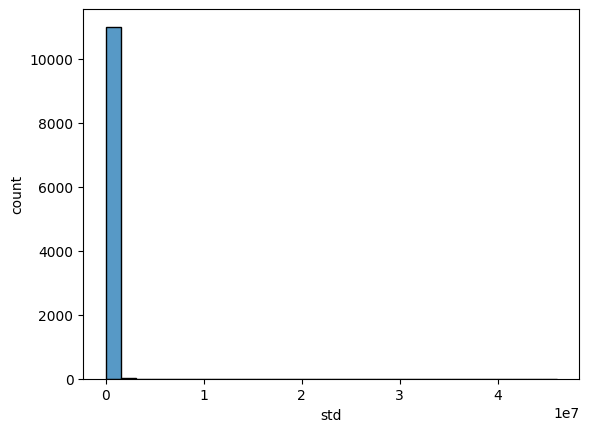

In [19]:
ax = sns.histplot(pid_summary[pid_summary["std"].isna() == False]["std"], bins = 30, stat="count")
ax.set(xlabel = "std", ylabel="count")

[Text(0.5, 0, 'log10(std)'), Text(0, 0.5, 'count')]

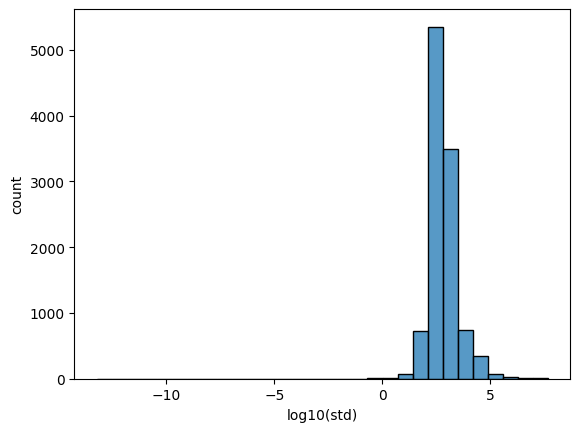

In [20]:
ax = sns.histplot(np.log10(pid_summary[~(pid_summary["std"].isna()) & pid_summary["std"]!=0]["std"]), bins = 30, stat="count")
ax.set(xlabel = "log10(std)", ylabel="count")

### Drilldown on Product Type

In [21]:
pid_summary[pid_summary["std"] > 10e5].head(10)

,count,mean,std,min,25%,50%,75%,max,PRODUCT_TYPE_ID
227,2752.0,29434.505829,1.500960e+06,1.000000,260.000000,500.000000,841.379921,78740200.0,228
601,712.0,56357.915859,1.475417e+06,3.937000,647.500000,1181.102361,1348.500000,39370100.0,604
1277,145.0,598281.559789,7.192841e+06,38.000000,590.551180,944.881889,1338.580000,86614220.0,1295
1281,224.0,283953.681172,4.233345e+06,40.000000,644.704724,1145.866141,1400.000000,63360000.0,1299
1374,397.0,567628.342268,1.128876e+07,39.370079,866.141731,1102.360000,1299.212597,224928000.0,1393
3008,169.0,214683.677345,1.378404e+06,100.000000,400.000000,590.551180,1062.992125,9515100.0,3067
3009,191.0,430419.843303,1.937892e+06,3.937000,590.551180,590.551180,793.700787,9545200.0,3068
3010,660.0,629968.667156,2.168572e+06,39.000000,500.000000,750.000000,950.000000,9961600.0,3069
3012,506.0,458321.659018,1.890238e+06,3.937000,500.000000,800.000000,1300.000000,10084200.0,3071
3014,2104.0,170673.235073,1.189060e+06,3.937000,500.000000,800.000000,1299.212597,9836700.0,3073


In [22]:
abpid = list(pid_summary[pid_summary["std"] > 10e5]["PRODUCT_TYPE_ID"])[0]
subset = train[train["PRODUCT_TYPE_ID"] == abpid]
subset.describe()["PRODUCT_LENGTH"]

count    2.752000e+03
mean     2.943451e+04
std      1.500960e+06
min      1.000000e+00
25%      2.600000e+02
50%      5.000000e+02
75%      8.413799e+02
max      7.874020e+07
Name: PRODUCT_LENGTH, dtype: float64

[Text(0.5, 0, 'PRODUCT_LENGTH'), Text(0, 0.5, 'count')]

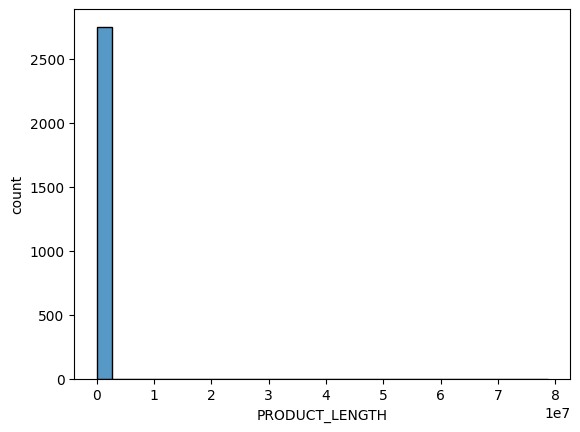

In [23]:
ax = sns.histplot(subset["PRODUCT_LENGTH"], bins = 30, stat="count")
ax.set(xlabel = "PRODUCT_LENGTH", ylabel="count")

[Text(0.5, 0, 'log10(PRODUCT_LENGTH)'), Text(0, 0.5, 'count')]

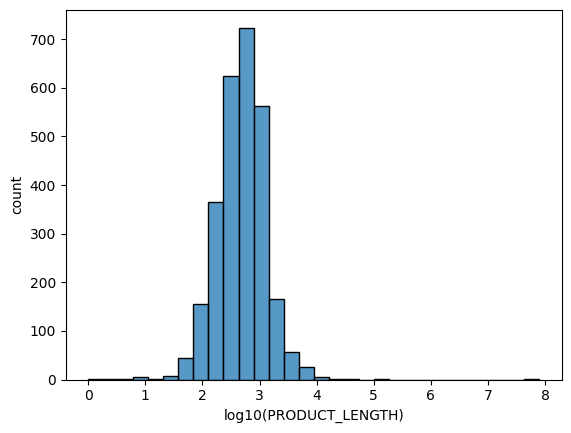

In [24]:
ax = sns.histplot(np.log10(subset["PRODUCT_LENGTH"]), bins = 30, stat="count")
ax.set(xlabel = "log10(PRODUCT_LENGTH)", ylabel="count")

In [25]:
subset.head(10)

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
1050,870979,Surf City Garage101 Clearly Better Glass Clean...,NaN,NaN,228,393.700787
1123,1365446,Babo Care Heel Grips Liners Back Heel Insoles ...,NaN,NaN,228,550.000000
3218,1593437,Wahl Speed Shave Rechargeable Wet/Dry Waterpro...,NaN,Wahl Speed Shave Rechargeable Wet/Dry Waterpro...,228,320.000000
4598,1048057,Samozdrav Breathing Device + English and Russi...,NaN,NaN,228,984.000000
4688,846026,Garelick Adjustable Hgt Footrest 15 2751601,NaN,NaN,228,976.000000
6517,854131,"Thompson Turmeric Curcumin Extract, 300 mg 60-...","[Once daily gel capsule,A member of the Nutrac...",Thompson turmeric curcumin is a standardized e...,228,260.000000
6852,1555521,Foster Grant Men's Boston Brown Reading Glasse...,NaN,NaN,228,700.000000
7038,2781196,Icy Hot Medicated Pain Relief Liquid with No M...,"[Pain relief roll on,Quick drying, stain-free....",Because you’re remarkably resilient. With the ...,228,236.220472
7148,1175941,Large Hot/Cold Gel Pack (Reusable) - With Comp...,NaN,NaN,228,3543.307083
8164,1750306,"Signal Haleine Pure Microspheres Toothpaste, 7...",NaN,NaN,228,830.707000


### Trimming 5% from both sides

In [26]:
slen = len(subset)
lens = sorted(subset["PRODUCT_LENGTH"])

low = lens[int(0.05*slen)]
high = lens[int(0.95*slen)]

In [27]:
subset2 = subset[(subset["PRODUCT_LENGTH"]>low) & (subset["PRODUCT_LENGTH"]<high)]
subset2.describe()["PRODUCT_LENGTH"]

count    2437.000000
mean      599.582354
std       389.913726
min       102.362000
25%       300.000000
50%       500.000000
75%       800.000000
max      1968.503935
Name: PRODUCT_LENGTH, dtype: float64

[Text(0.5, 0, 'PRODUCT_LENGTH (5% trim)'), Text(0, 0.5, 'count')]

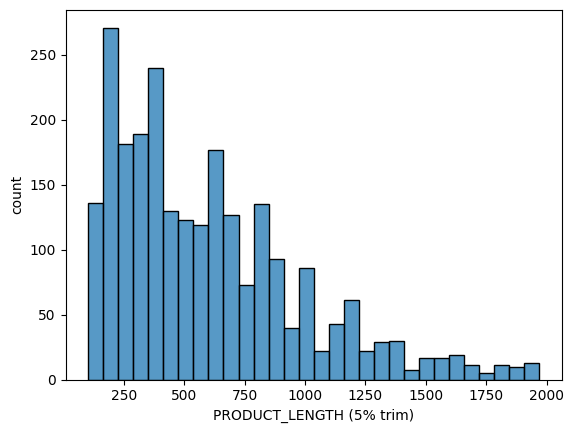

In [28]:
ax = sns.histplot(subset2["PRODUCT_LENGTH"], bins = 30, stat="count")
ax.set(xlabel = "PRODUCT_LENGTH (5% trim)", ylabel="count")

### Trimming 2.5% from both sides

In [29]:
slen = len(subset)
lens = sorted(subset["PRODUCT_LENGTH"])

low = lens[int(0.025*slen)]
high = lens[int(0.975*slen)]

In [30]:
subset3 = subset[(subset["PRODUCT_LENGTH"]>low) & (subset["PRODUCT_LENGTH"]<high)]
subset3.describe()["PRODUCT_LENGTH"]

count    2614.000000
mean      635.724620
std       504.014879
min        74.300000
25%       275.590551
50%       500.000000
75%       808.976378
max      3050.000000
Name: PRODUCT_LENGTH, dtype: float64

[Text(0.5, 0, 'PRODUCT_LENGTH (2.55% trim)'), Text(0, 0.5, 'count')]

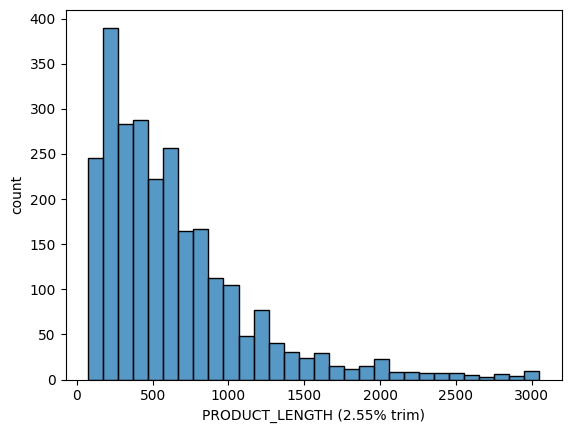

In [31]:
ax = sns.histplot(subset3["PRODUCT_LENGTH"], bins = 30, stat="count")
ax.set(xlabel = "PRODUCT_LENGTH (2.55% trim)", ylabel="count")

# Applying stratified 5% filter on full dataset

In [32]:
# for pid in tqdm(trainpid) : 
#   subset = train[train["PRODUCT_TYPE_ID"] == pid]
#   slen = len(subset)
#   lens = sorted(subset["PRODUCT_LENGTH"])
#   low = lens[int(0.05*slen)]
#   high = lens[int(0.95*slen)]
#   train = train[(train["PRODUCT_TYPE_ID"] != pid) | ((train["PRODUCT_TYPE_ID"] == pid) & (train["PRODUCT_LENGTH"]>low) & (train["PRODUCT_LENGTH"]<high))]

## Distributions after 5% filter

In [33]:
# ax = sns.histplot(train["PRODUCT_LENGTH"], bins = 30, stat="count")
# ax.set(xlabel = "PRODUCT_LENGTH", ylabel="count")

In [34]:
# ax = sns.histplot(np.log10(train["PRODUCT_LENGTH"]), bins = 40, stat="count")
# ax.set(xlabel = "log10(PRODUCT_LENGTH)", ylabel="count")

# Applying global 2.5% filter from upper end

In [35]:
train.describe()

,PRODUCT_ID,PRODUCT_TYPE_ID,PRODUCT_LENGTH
count,2.249698e+06,2.249698e+06,2.249698e+06
mean,1.499795e+06,4.000456e+03,4.071839e+03
std,8.661944e+05,3.966146e+03,1.351685e+06
min,1.000000e+00,0.000000e+00,1.000000e+00
25%,7.494795e+05,2.300000e+02,5.118110e+02
50%,1.499558e+06,2.916000e+03,6.630000e+02
75%,2.250664e+06,6.403000e+03,1.062992e+03
max,2.999999e+06,1.342000e+04,1.885801e+09


In [36]:
slen = len(train)
lens = sorted(train["PRODUCT_LENGTH"])
high = lens[int(0.95*slen)]
train = train[train["PRODUCT_LENGTH"]<high]

In [37]:
train.describe()

,PRODUCT_ID,PRODUCT_TYPE_ID,PRODUCT_LENGTH
count,2.137182e+06,2.137182e+06,2.137182e+06
mean,1.475392e+06,3.960381e+03,7.898216e+02
std,8.713366e+05,3.974686e+03,5.214908e+02
min,1.000000e+00,0.000000e+00,1.000000e+00
25%,7.120892e+05,1.540000e+02,5.000000e+02
50%,1.460700e+06,2.916000e+03,6.250000e+02
75%,2.232898e+06,6.327000e+03,9.842520e+02
max,2.999999e+06,1.342000e+04,3.421253e+03


[Text(0.5, 0, 'PRODUCT_LENGTH'), Text(0, 0.5, 'count')]

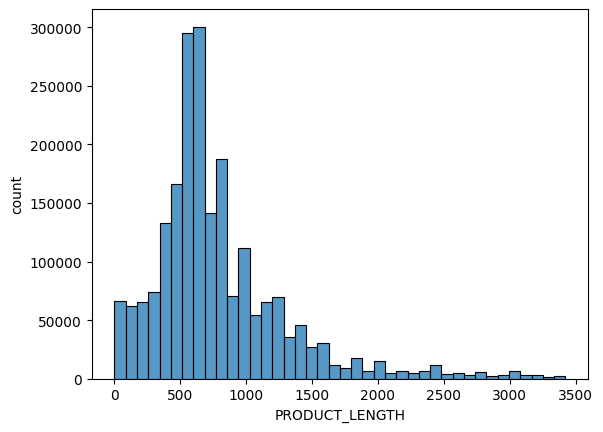

In [38]:
ax = sns.histplot(train["PRODUCT_LENGTH"], bins = 40, stat="count")
ax.set(xlabel = "PRODUCT_LENGTH", ylabel="count")

# Examples

In [39]:
train.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,NaN,1650,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",NaN,2755,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,NaN,NaN,6112,598.424000


In [40]:
stuff = train.iloc[2]

In [41]:
print(stuff["TITLE"])

PRIKNIK Horn Red Electric Air Horn Compressor Interior Dual Tone Trumpet Loud Compatible with SX4


In [42]:
for i in stuff["DESCRIPTION"].split(",") :
  print(i.strip())

Specifications: Color: Red
Material: Aluminium
Voltage: 12V
dB: 130 dB (around)
Material: Aluminum Pump Head + Steel Pump Body + ABS Shell and Parts DB output: 130db Voltage: 12v Sound Type: Dual Tone Application: 12V Voltage Vehicles With Battery Above 20A Package included: 1 x Dual Tone Air Horn Compatible With SX4


In [43]:
for i in list(stuff["BULLET_POINTS"].strip()[1:-1].split(",")) : 
  print(i.strip())

Loud Dual Tone Trumpet Horn
Compatible With SX4
Electric Air Horn with Compressor
Compatible With SX4
High Quality
High Intensity Horn Sound
Compatible With SX4
Color: Red
Compatible With SX4
Professional installation required
Compatible With SX4


# Sentence Processing

In [44]:
train = train.fillna("")
test = test.fillna("")

In [45]:
def combined(x) :
  return x["TITLE"] + "\n" + x["BULLET_POINTS"] + "\n" + x["DESCRIPTION"]

In [46]:
combined(train.iloc[0])

'ArtzFolio Tulip Flowers Blackout Curtain for Door, Window & Room | Eyelets & Tie Back | Canvas Fabric | Width 4.5feet (54inch) Height 5 feet (60 inch); Set of 2 PCS\n[LUXURIOUS & APPEALING: Beautiful custom-made curtains to decorate any home or office | Includes inbuilt tieback to hold the curtain | Completely finished and ready to hang on walls & windows,MATERIAL: Luxurious & versatile fabric with a natural finish | High colour fastness | State-of-the-art digital printing ensures colour consistency and prevents any fading | Eyelets; Cotton Canvas; Width 4.5feet (54inch) | Multicolour | PACKAGE: 2 Room Curtains Eyelets | SIZE: Height 5 feet (60 inch); SET OF 2 PCS,BLACKOUT CURTAIN: 100% opaque & heavy premium cotton canvas fabric | Tight knitted, long life & durable fabric | Printing only on front side with a plain colour back side,MADE TO PERFECTION: Large eyelets at the top to put hanging hooks | Perfectly tailored seams for durability | Refined stitching with a matching thread colo

In [47]:
train["DATA"] = train.apply(lambda x : combined(x).strip(), axis=1)
test["DATA"] = test.apply(lambda x : combined(x).strip(), axis=1)

In [48]:
train.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH,DATA
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,,1650,2125.980000,ArtzFolio Tulip Flowers Blackout Curtain for D...
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",,2755,393.700000,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495,PRIKNIK Horn Red Electric Air Horn Compressor ...
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574,ALISHAH Women's Cotton Ankle Length Leggings C...
4,283658,The United Empire Loyalists: A Chronicle of th...,,,6112,598.424000,The United Empire Loyalists: A Chronicle of th...


In [49]:
FIELDS = ["TITLE", "BULLET_POINTS", "DESCRIPTION", "DATA"]
for field in FIELDS : 
  train[f"{field}_L"] = train.apply(lambda x : len(x[field]), axis = 1)
  test[f"{field}_L"] = test.apply(lambda x : len(x[field]), axis = 1)

In [50]:
train[[f"{field}_L" for field in FIELDS]].describe()

,TITLE_L,BULLET_POINTS_L,DESCRIPTION_L,DATA_L
count,2.137182e+06,2.137182e+06,2.137182e+06,2.137182e+06
mean,8.541253e+01,2.999315e+02,2.942074e+02,6.806640e+02
std,4.875564e+01,4.049839e+02,4.655253e+02,8.012327e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.900000e+01,0.000000e+00,0.000000e+00,7.100000e+01
50%,7.700000e+01,1.300000e+02,0.000000e+00,3.370000e+02
75%,1.150000e+02,4.650000e+02,4.530000e+02,1.058000e+03
max,5.000000e+02,6.503000e+03,4.524000e+03,8.124000e+03


In [51]:
test[[f"{field}_L" for field in FIELDS]].describe()

,TITLE_L,BULLET_POINTS_L,DESCRIPTION_L,DATA_L
count,734736.000000,734736.000000,734736.000000,734736.000000
mean,86.400982,310.947562,302.685001,701.164745
std,49.018534,410.903648,473.465511,812.633012
min,0.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,0.000000,74.000000
50%,78.000000,142.000000,0.000000,363.000000
75%,117.000000,486.000000,468.000000,1089.000000
max,940.000000,4860.000000,6659.000000,8540.000000


<Axes: xlabel='DATA_L', ylabel='Count'>

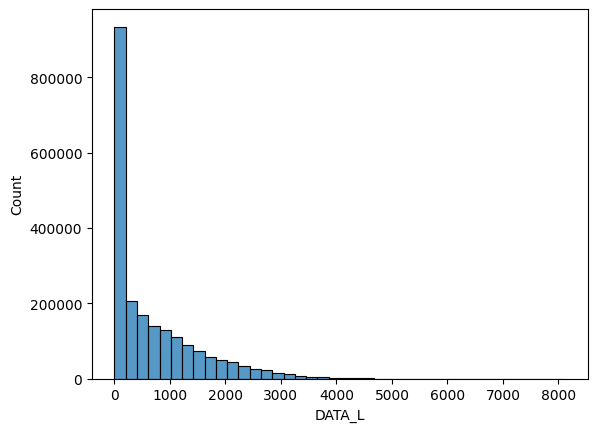

In [52]:
sns.histplot(train[train["DATA_L"] > 0]["DATA_L"], stat="count", bins=40)

In [53]:
train.columns

Index(['PRODUCT_ID', 'TITLE', 'BULLET_POINTS', 'DESCRIPTION',
       'PRODUCT_TYPE_ID', 'PRODUCT_LENGTH', 'DATA', 'TITLE_L',
       'BULLET_POINTS_L', 'DESCRIPTION_L', 'DATA_L'],
      dtype='object')

In [54]:
train = train[['PRODUCT_TYPE_ID', 'PRODUCT_LENGTH', 'DATA', 'DATA_L']]

In [55]:
train.to_csv("train_processed.csv", index=False)

In [56]:
test = test[['PRODUCT_TYPE_ID', 'DATA']]

In [57]:
test.to_csv("test_processed.csv", index=False)